# Basic Data Analysis, Manipulation and Statistical Inference with Julia 0.5.0
## by Yanal Kashou

### Data loading

In [2]:
using DataFrames
using RDatasets

In [3]:
diamond = dataset("Ecdat", "Diamond")
head(diamond, 5)

,Carat,Colour,Clarity,Certification,Price
1,0.3,D,VS2,GIA,1302
2,0.3,E,VS1,GIA,1510
3,0.3,G,VVS1,GIA,1510
4,0.3,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


### Descriptive Statistics

In [4]:
describe(diamond)

Carat
Min      0.18
1st Qu.  0.35
Median   0.62
Mean     0.630909090909091
3rd Qu.  0.85
Max      1.1
NAs      0
NA%      0.0%

Colour
Length  308
Type    Pooled String
NAs     0
NA%     0.0%
Unique  6

Clarity
Length  308
Type    Pooled String
NAs     0
NA%     0.0%
Unique  5

Certification
Length  308
Type    Pooled String
NAs     0
NA%     0.0%
Unique  3

Price
Min      638.0
1st Qu.  1625.0
Median   4215.0
Mean     5019.483766233766
3rd Qu.  7446.0
Max      16008.0
NAs      0
NA%      0.0%



### Exploratory Plots using Gadfly

In [5]:
using Gadfly

In [6]:
diamond[:AdjustedPrice] = diamond[:Price] / 1000;

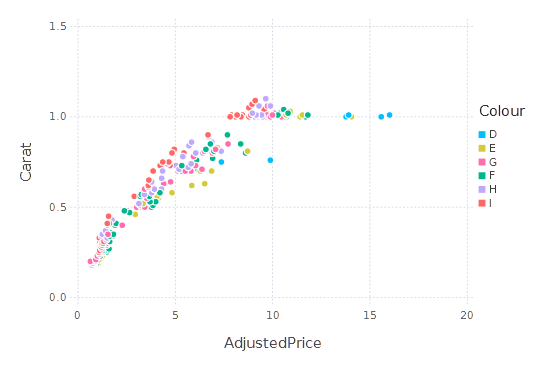

In [67]:
plot(diamond, x = "AdjustedPrice", y = "Carat", 
color = "Colour", Geom.point)

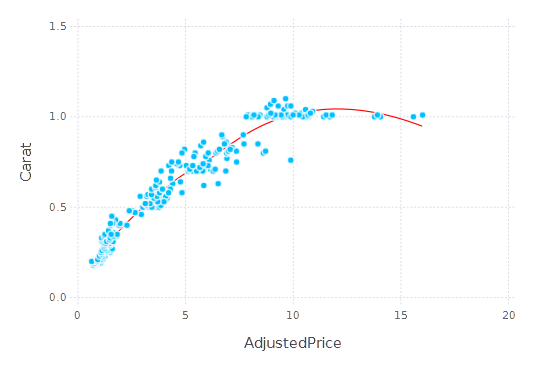

In [70]:
plot(diamond, x = "AdjustedPrice", y = "Carat", Geom.point, 
layer(x = "AdjustedPrice", y = "Carat", Geom.smooth, Theme(default_color=colorant"red")))

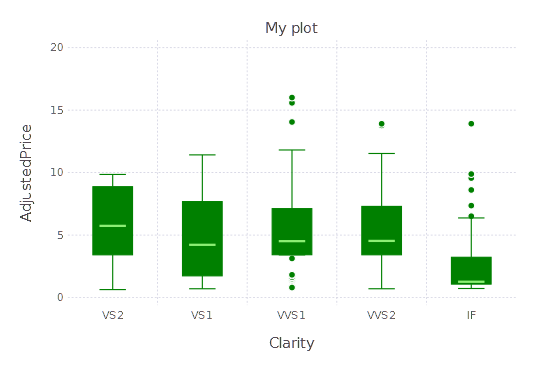

In [60]:
plot(diamond, x = "Clarity", y = "AdjustedPrice", Geom.boxplot, Guide.title("My plot"), Theme(default_color = colorant"green", boxplot_spacing = 50px))

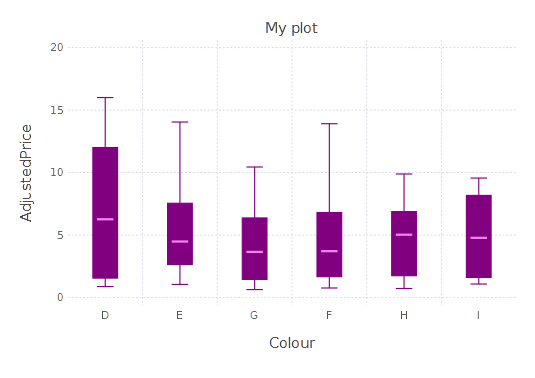

In [55]:
plot(diamond, x = "Colour", y = "AdjustedPrice", Geom.boxplot, Guide.title("My plot"), Theme(default_color = colorant"purple", boxplot_spacing = 50px))

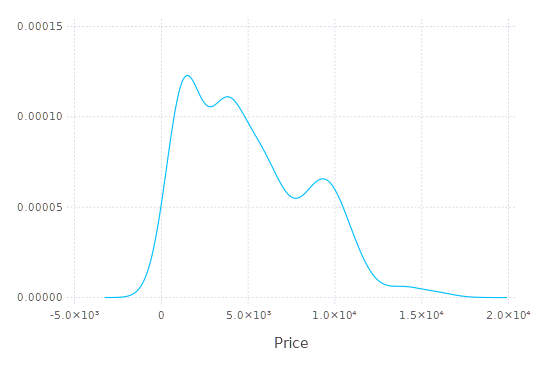

In [62]:
plot(diamond, x = "Price", Geom.density)

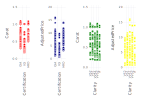

In [11]:
hstack(plot(diamond, layer(x = "Certification", y = "Carat", Geom.point, Theme(default_color=colorant"red"))),
plot(diamond, layer(x = "Certification", y = "AdjustedPrice", Geom.point, Theme(default_color=colorant"navy"))),
plot(diamond, layer(x = "Clarity", y = "Carat", Geom.point, Theme(default_color=colorant"green"))),
plot(diamond, layer(x = "Clarity", y = "AdjustedPrice", Geom.point, Theme(default_color=colorant"yellow"))))

### Piechart Plots Using Vega

In [28]:
using Vega

In [29]:
ColourDF = by(diamond, :Colour, nrow)

,Colour,x1
1,D,16
2,E,44
3,F,82
4,G,65
5,H,61
6,I,40


In [30]:
ClarityDF = by(diamond, :Clarity, nrow)

,Clarity,x1
1,IF,44
2,VS1,81
3,VS2,53
4,VVS1,52
5,VVS2,78


In [31]:
x1 = Array(ColourDF[:Colour])
y1 = Array(ColourDF[:x1])

x2 = Array(ClarityDF[:Clarity])
y2 = Array(ClarityDF[:x1])

Patchwork.load_js_runtime()

pie1 = piechart(x = x1, y = y1, holesize = 75)
pie2 = piechart(x = x2, y = y2, holesize = 75);

#### Piechart by "Colour" Column

In [33]:
pie1

#### Piechart By "Clarity" Column

In [34]:
pie2

### Linear Models

In [35]:
using GLM, Distributions;

In [36]:
lm1 = fit(LinearModel, Price ~ Carat, diamond)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: Price ~ 1 + Carat

Coefficients:
             Estimate Std.Error  t value Pr(>|t|)
(Intercept)  -2298.36   158.531 -14.4979   <1e-35
Carat         11598.9   230.111  50.4057   <1e-99


In [37]:
confint(lm1)

2×2 Array{Float64,2}:
 -2610.31  -1986.41
 11146.1   12051.7 

In [38]:
lm2 = fit(LinearModel, Price ~ Carat + Colour + Clarity + Certification, diamond)

DataFrames.DataFrameRegressionModel{GLM.LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredQR{Float64}},Array{Float64,2}}

Formula: Price ~ 1 + Carat + Colour + Clarity + Certification

Coefficients:
                    Estimate Std.Error  t value Pr(>|t|)
(Intercept)          169.176   255.016 0.663395   0.5076
Carat                12766.4   190.024  67.1829   <1e-99
Colour: E           -1439.09   207.982 -6.91929   <1e-10
Colour: F           -1841.69   195.232 -9.43336   <1e-17
Colour: G           -2176.67   200.393  -10.862   <1e-22
Colour: H           -2747.15   202.914 -13.5385   <1e-32
Colour: I            -3313.1   212.715 -15.5753   <1e-39
Clarity: VS1        -1474.57   159.675  -9.2348   <1e-17
Clarity: VS2        -1792.01   171.185 -10.4682   <1e-21
Clarity: VVS1        -689.29   159.925 -4.31008    <1e-4
Clarity: VVS2       -1191.16   148.758 -8.00739   <1e-13
Certification: HRD   15.2267   107.247 0.141977   0.8872
Certification: IGI   141.262   128.258  1.10139   0.2716

### Ordinary Least Squares Regression

In [39]:
GLM1 = glm(Carat ~ AdjustedPrice, diamond, Normal(), IdentityLink())

DataFrames.DataFrameRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Distributions.Normal{Float64},GLM.IdentityLink},GLM.DensePredChol{Float64,Base.LinAlg.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Carat ~ 1 + AdjustedPrice

Coefficients:
                Estimate  Std.Error z value Pr(>|z|)
(Intercept)     0.244671 0.00925293 26.4425   <1e-99
AdjustedPrice  0.0769478 0.00152657 50.4057   <1e-99


In [40]:
stderr(GLM1)

2-element Array{Float64,1}:
 0.00925293
 0.00152657

In [41]:
GLM1Fit = predict(GLM1);
size(GLM1Fit)

(308,)

In [42]:
diamond[:GLM1Fit] = GLM1Fit;
head(diamond, 10)

,Carat,Colour,Clarity,Certification,Price,AdjustedPrice,GLM1Fit
1,0.3,D,VS2,GIA,1302,1.302,0.3448569645145239
2,0.3,E,VS1,GIA,1510,1.51,0.3608621029445833
3,0.3,G,VVS1,GIA,1510,1.51,0.3608621029445833
4,0.3,G,VS1,GIA,1260,1.26,0.34162515771614654
5,0.31,D,VS1,GIA,1641,1.641,0.37094226224428417
6,0.31,E,VS1,GIA,1555,1.555,0.3643247530857019
7,0.31,F,VS1,GIA,1427,1.427,0.3544754371287423
8,0.31,G,VVS2,GIA,1427,1.427,0.3544754371287423
9,0.31,H,VS2,GIA,1126,1.126,0.33131415507370443
10,0.31,I,VS1,GIA,1126,1.126,0.33131415507370443


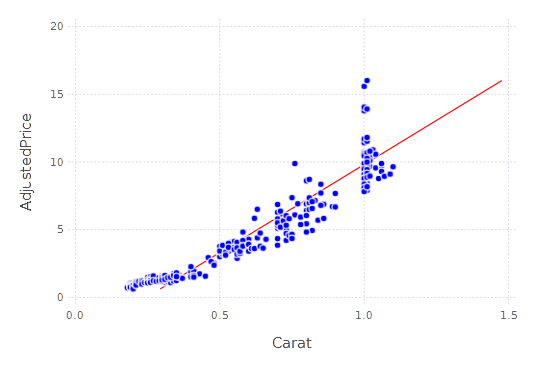

In [52]:
plot(diamond, layer(x = "Carat", y = "AdjustedPrice", Geom.point, Theme(default_color=colorant"blue")), 
layer(x = "GLM1Fit", y = "AdjustedPrice", Geom.line, Theme(default_color=colorant"red")))